# Equações diferencias ordinárias

Equações diferencias ordinárias (EDO) são equações contendo uma ou mais funções de uma variável independente e suas derivadas.

A Lei de Newton é um exemplo de EDO:

$$ \frac{d\vec{P}}{dt} = \vec{F} $$

EDO aparecem em inúmeros contextos científicos e práticos no mundo. É sem dúvida uma das principais ferramentas matemáticas usadas em particular na Física.

Para uma descrição detalhada de EDOs veja: https://en.wikipedia.org/wiki/Ordinary_differential_equation

Em muitas situações soluções exatas analíticas não são possíveis e portato precisamos adotar técnicas numéricas. Veremos aqui as principais técnicas e estratégias para resolver este tipo de equação.


## Método de Euler

Para entender de maneira mais simples a estratégia de solução numérica dessas equações partimos de:

$$ a = \frac{dv}{dt} $$

podemos reescrever a equação acima como:

$$ dv = a~dt $$ 

que pode ser discretizada como 

$$\Delta v = a~ \Delta t$$               (2)

A partir daqui fica fácil implementar estratégias numéricas. Para tanto precisamos definir as condições iniciais do problema que desejamos resolver. A evolução da solução a partir das condições iniciais $t_0$ e $v_0$ é obtida como:

$$ v_{i+1} = v_i + \frac{dv}{dt}~\Delta t $$

Como sabemos a relação entre velocidade e posição podemos uma relação semelhante a acima para obter a posição no problema acima, definindo assim o estado $[x_i,v_i]$ para uma dado tempo $t$.

O método descrito acima é bem simples de ser implementado mas produz soluções bem aproximadas. Ele é conhecido como **Método de Euler**.

## Montando o problema

Antes de seguirmos na discussão dos métodos de resolução de EDOs, é interessante discutiros uma estratégia geral para montar o problema a ser resolvido. Isso facilitará a obtenção de problemas mais complexos e com métodos diversos mais a frente.

Considere o problema de uma particula em queda livre:

$$ \ddot{x} = -g $$

A equação acima pode ser decomposta em duas EDOs com derivadas simples:

$$ \dot{x} = v $$ $$ \dot{v} = -g $$

Usando o método de Euler para obter o estado $[x_i,v_i]$ da partícula em um dado $t$ temos:

$$ x_{i+1} = x_i + \dot{x}~\Delta t $$
$$ v_{i+1} = v_i + \dot{v}~\Delta t $$

A forma acima sugere que podemos escrever o sistema acima como uma única equação vetorial sendo:

$$ y = \begin{bmatrix} x \\ v \end{bmatrix} $$

$$ \dot{y} = \begin{bmatrix} v \\ -g \end{bmatrix} $$

$$ y_{i+1} = y_i + \dot{y}~\Delta t ~~~~~~~~~~(1)$$

Com base na equação acima, vemos que se temos uma função que retorna as derivadas relevantes do problema e as condições iniciais, podemos usar as capacidades vetoriais do Python para definir uma estratégia genérica de solução de EDOs.

Primeiro definimos o problema ou modelo criando uma função que retorna as derivadas de todos os elementos de $y$.


In [4]:
################################################################
#      Queda livre
# definindo o problema
#
#     d^2x/dt^2 = −g
#
#    y = [x,v] e dy/dt = [v,-g]
#
#   definimos o estado do sistema como y
#

def quedalivre(estado, tempo):
    g0 = estado[1]
    g1 = -9.8
    return np.array( [ g0 , g1 ] )



definido o modelo a ser estudado, podemos escrever a parte que realiza a solução, no caso a implementação do método de Euler:

In [5]:
def euler(y,t,dt,model):
    ynext = y + model(y, t) * dt
    return ynext


Note que a função do método recebe a posição atual, ou estado atual, o tempo atual e o $\Delta t$ adotado, assim como a função que define o modelo a ser estudado. Esta função implemnta a equação (1) discutida acima.

Implementando as duas funçĩes acima para solução de um problema específico agora fica fácil:

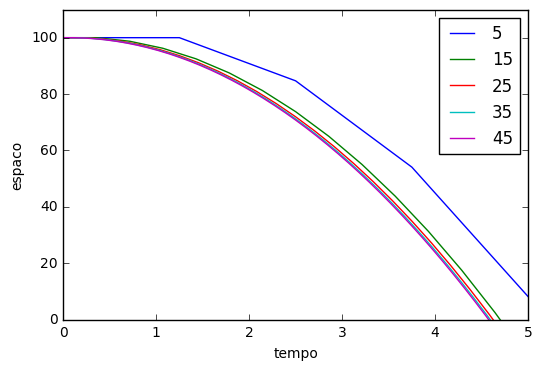

In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

#plt.figure()

for N in range(5,50,10):                # looping para gerar soluções com resoluções diferentes
    
    #definindo valores iniciais
    tmax = 5.0                            #Tempo máximo para o cálculo
    
    dt = tmax / float(N-1)                # delta t a ser usado
    
    time = np.linspace(0 , tmax , N)      # vetor dos tempos
    
    #definindo o vetor de estado do modelo    
    y = np.zeros( [ N, 2 ] )
    
    #definindo os estado inicial
    y [0,0] = 100.                         # posição inicial
    y [0,1] = 0.                           # velocidade inicial


    # Aqui aplicamos o método de Euler a partir da condição inicial 
    # e seguindo pelo vetor de tempo
    
    for j in range (N-1):
        y[j+1] = euler(y[j], time[j], dt, quedalivre)

    
    # plota as soluções obtidas
    plt.plot(time,y[:,0], label=str(N))    
    plt.ylim(0,110)
    plt.xlabel('tempo')
    plt.ylabel('espaco')
    
plt.legend()
plt.show()

### Erros no método de  Euler

Para avaliar os erros cometidos pelo método fazemos uma expansão de Série de Taylor da função y no ponto $t=t_0+h$:

$$ y(t_{0}+h)=y(t_{0})+hy'(t_{0})+{\frac {1}{2}}h^{2}y''(t_{0})+O(h^{3}). $$


note que os dois primeiros termos da série é exatamente o método de Euler. Com isso o erro cometido em cada passo, ou erro de truncamento local (ETL) é dado por:

$$ \mathrm {ETL} =y(t_{0}+h)-y_{1}={\frac {1}{2}}h^{2}y''(t_{0})+O(h^{3}). $$

para $ \xi \in [t_{0},t_{0}+h]$.

Como obtemos as soluções em um número de intervalos e não somente em um ponto, o erro local se propaga para os passos seguintes. Desse modo obtemos o erro de truncamento global (ETG):

$$ \mathrm {ETG} = n\mathrm {ETL} = \frac{(t-t_0)}{h} {\frac {1}{2}}h^{2}y''(t_{0}) = (t-t_0) {\frac {1}{2}}hy''(t_{0}) $$

Ou seja, o método de Euler é um método de primeira ordem em h.

Uma variante simples do método de Euler é o Metodo do Ponto Médio. Neste método a derivada é estimada no ponto $(t+h/2)$, ou seja, no ponto médio entre $t$ e $t+h$. Com essa simples mudança o método do ponto médio se torna um método de orden 2.

## Métodos de Runge-Kutta

Os métodos de Runge-Kutta (RK) podem ser pensados como uma generalização da filosofia apresentada para o Método de Euler. Sendo $\frac{dy}{dx}=f(x,y)$ temos que os métodos RK são da forma:

$$ y_{i+1} = y_i + \varphi (x_i,y_i) h ~~~~~~~~~~(2)$$

onde $\varphi (x_i,y_i)$ são estimativas das derivadas necessárias.
As estimativas das derivadas podem ser do tipo explicito:

$$ \varphi (x_i,y_i) = \sum _{i=1}^{s}a_{i}k_{i} ~~~~~~~~~~(3)$$

ou do tipo implicito:

$$  y_{n+1}=y_{n}+h\sum _{i=1}^{s}b_{i}k_{i} ~~~~~~~~~~(4)$$

onde:

$$ \displaystyle k_{i}=f\left(t_{n}+c_{i}h,\ y_{n}+h\sum _{j=1}^{s}a_{ij}k_{j}\right),\quad i=1,\ldots ,s. $$


onde $a_i$ são constantes e $k_i$ são combinações lineares de estimativas da derivada $\frac{dy}{dx}$.

Para entender melhor vamos construir as formulas para o método RK de segunda ordem.

### Runge-Kutta de segunda ordem 

Para obter as expressões do método RK de $2^a$ ordem começamos pela integração formal do problema a ser estudado:

$$ \frac{dy}{dt} = f(y,t) \implies y(t) = \int{f(y,t)dt}  \implies y_{i+1} = y_i + \int^{t_{i+1}}_{t_i}{f(y,t)dt} $$ 

Para obter a integral expandimos usando uma série de Taylor em torno do ponto médio $t_{i+1/2}$:

$$ f(t,y) \approx f(y_{i+1/2},t_{i+1/2}) + (t-t_{i+1/2}) \frac{df}{dt}(t_{i+1/2}) + O(h^{2}) $$

como o termo $(t-t_{i+1/2})$ elevado a qualquer potência ímpar é igualmente positivo e negativo no intervalo $t_i<t<t_{i+1}$ temos:


$$ \int^{t_{i+1}}_{t_i}{f(y,t)dt} \approx f(y_{i+1/2},t_{i+1/2})(t_{i+1}-t_i) + O(h^{3})$$

sendo $h=(t_{i+1}-t_i)$ temos:

$$ y_{i+1} = y_i + f(y_{i+1/2},t_{i+1/2})h + O(h^{3})$$

Veja que o cancelamento dos termos de primeira ordem implica em uma precisão de $2^a$ ordem para o método. Mas a relação acima ainda não é a final pois precisamos obter $f(t_{i+1/2},y_{i+1/2})$. No entanto só sabemos $f(t_{i},y_{i})$. Para fazer isso usamos o método de Euler para obter a derivada no ponto médio:

$$ y_{i+1/2} \approx y_i + \frac{h}{2}\frac{dy}{dt} = y_i + \frac{hf(y_i,t_i)}{2} $$

Assim, podemos resumir o RK de $2^a$ ordem como:

$$ k_1 = hf(y_i,t_i) $$

$$ k_2 = hf(y_i+\frac{1}{2}k_1,t_{i+1/2}) $$

$$ y_{i+1} = y_i + k_2 $$




## Pendulo simples

Vamos aplicar o que vimos acima para a solução do proble do pendulo simples. Assumindo que podemos desprezar a resistência do ar podemos escrever a EDO para este sistema com base na lei de Newton como:

$$ {\frac {d^{2}\theta }{dt^{2}}}+{\frac {g}{\ell }}\sin \theta =0. $$

A solução para angulos pequenos onde $\sin \theta \approx \theta$ pode ser obtida analíticamente e é dada por:

$$ \theta (t)=\theta _{0}\cos \left({\sqrt {g \over \ell }}t\right) $$


Usando a metodologia descrita anteriormente definimos este problema como:

In [10]:
################################################################
#      Oscilador Harmonico
#      definindo o problema para a equação 
#      dxˆ2/dt = − g/l sin(theta)
#
#      d1 -> dtheta/dt=v   e d2 -> dv/dt = − g/l sin(theta)

def pendulo(estado, tempo):
    l = 0.1                           # comprimento do pendulo
    
    g0 = estado[1]                    # primeira derivada 
    
    g1 = -9.8/l*np.sin(estado[0])     # segunda derivada
    
    return np.array( [ g0 , g1 ] )


O método de RK de $2^a$ ordem é implementado como:

In [11]:
def rk2 (y, time, dt, model):
    k0 = dt * model(y, time )
    k1 = dt * model(y + k0, time + dt)
    ynext = y + 0.5 * ( k0 + k1 )
    return ynext

Note a semelhança com a implementação do método de Euler feita anteriormente.

Para resolvermos o problema agora, basta escrever o programa de modo a definir as condições iniciais.

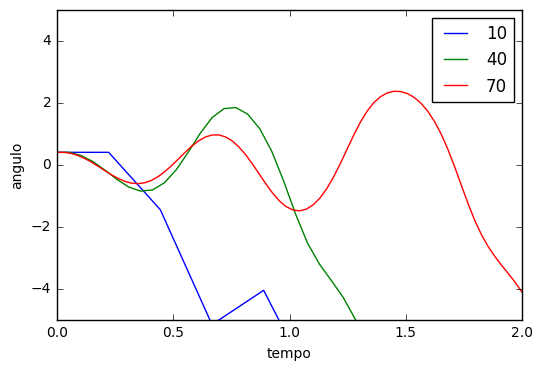

In [21]:
# Resolvendo o problema com Euler

tmax = 2.0 #limite de tempo

plt.figure()

for N in range(10,100,30):
    
    dt = tmax / float(N-1)
    time = np.linspace(0 , tmax , N)
    
    # definindo estado inicial
    y = np.zeros( [ N, 2 ] )
    y [0,0] = np.pi/8.0   # angulo inicial
    y [0,1] = 0.          # velocidade angular inicial



    for j in range (N-1):
        y[j+1] = euler(y[j], time[j], dt, pendulo)


    plt.plot(time,y[:,0],label=str(N))    
    plt.ylim(-5,5)
    plt.xlabel('tempo')
    plt.ylabel('angulo')
plt.legend()

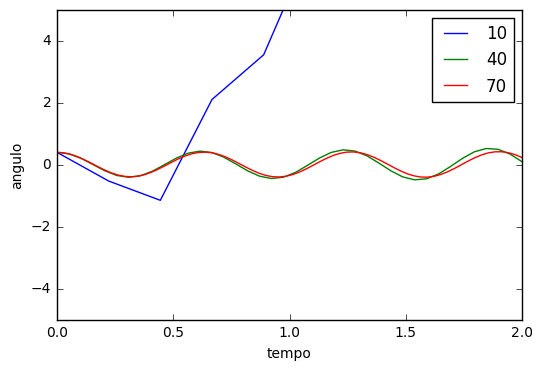

In [22]:
# Resolvendo o problema com RK2a

tmax = 2.0 #limite de tempo

plt.figure()

for N in range(10,100,30):
    
    dt = tmax / float(N-1)
    time = np.linspace(0 , tmax , N)
    
    # definindo estado inicial
    y = np.zeros( [ N, 2 ] )
    y [0,0] = np.pi/8.0   # angulo inicial
    y [0,1] = 0.          # velocidade angular inicial



    for j in range (N-1):
        y[j+1] = rk2(y[j], time[j], dt, pendulo)


    plt.plot(time,y[:,0],label=str(N))    
    plt.ylim(-5,5)
    plt.xlabel('tempo')
    plt.ylabel('angulo')
plt.legend()